In [1]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

# Load the MNIST data set.

In [2]:
(data_train, target_train), (data_test, target_test) = mnist.load_data()

In [3]:
data_train.shape

(60000, 28, 28)

# Display the first five images in the training data set

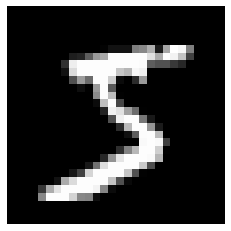

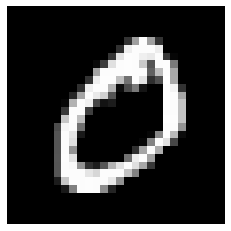

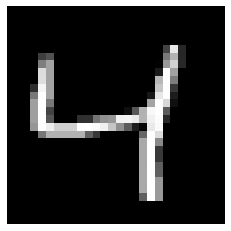

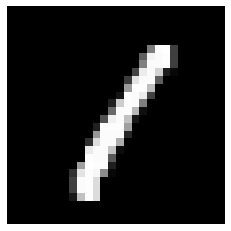

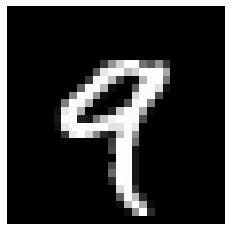

In [4]:
images=data_train[:5]
from matplotlib import pyplot as plt

for image in images:
    # Show image
    plt.imshow(image, cmap="gray"), plt.axis("off")
    plt.show()

# Compare these to the first five training labels

In [5]:
labels=target_train[:5]
print(labels)

[5 0 4 1 9]


# Build and train a Keras CNN classifier on the MNIST training set.

In [6]:
# Set image information
channels = 1
height = 28
width = 28

In [7]:
data_train.shape[0]

60000

In [8]:
# Reshape training image data into features
data_train = data_train.reshape(data_train.shape[0],height, width, channels).astype('float32')
# Reshape test image data into features
data_test = data_test.reshape(data_test.shape[0], height, width,channels).astype('float32')
# Rescale pixel intensity to between 0 and 1
features_train = data_train / 255
features_test = data_test / 255

In [9]:
# One-hot encode target
number_of_classes = 10
target_train = np_utils.to_categorical(target_train,10)
target_test = np_utils.to_categorical(target_test,10)

# Start neural network
network = Sequential()

In [10]:
# Add convolutional layer with 64 filters, a 5x5 window, and ReLU activation function
network.add(Conv2D(filters=64,kernel_size=(5, 5),input_shape=(height, width,channels)))

In [11]:
# Add max pooling layer with a 2x2 window
network.add(MaxPooling2D(pool_size=(2, 2)))

# Add dropout layer
network.add(Dropout(0.5))

# Add layer to flatten input
network.add(Flatten())

# # Add fully connected layer of 128 units with a ReLU activation function
network.add(Dense(128, activation="relu"))

# Add dropout layer
network.add(Dropout(0.5))

In [12]:
# Add fully connected layer with a softmax activation function
network.add(Dense(number_of_classes, activation="softmax"))

# Compile neural network
network.compile(loss="categorical_crossentropy", # Cross-entropy
optimizer="rmsprop", # Root Mean Square Propagation
metrics=["accuracy"]) # Accuracy performance metric

# Train neural network
# Fitting our model 
network.fit(features_train, # Features
target_train, # Target
epochs=2, # Number of epochs
batch_size=1000, # Number of observations per batch
validation_data=(features_test, target_test)
)

Epoch 1/2
60/60 [==============================] - 36s 574ms/step - loss: 0.5213 - accuracy: 0.8399 - val_loss: 0.2068 - val_accuracy: 0.9388
Epoch 2/2
60/60 [==============================] - 34s 569ms/step - loss: 0.2278 - accuracy: 0.9338 - val_loss: 0.1106 - val_accuracy: 0.9662


# Report the test accuracy of your model.

In [13]:
loss, accuracy = network.evaluate(features_test, target_test, verbose = 0, batch_size = 200)

print('loss:', loss)
print('accuracy:', accuracy)

loss: 0.11064561456441879
accuracy: 0.9661999940872192


In [14]:
target_predict = np.argmax(network.predict(features_test), axis = 1)
target_test_max = np.argmax(target_test,axis = 1) 

313/313 [==============================] - 2s 7ms/step


# Display a confusion matrix on the test set classifications.

In [15]:
# Display confusion matrix

from sklearn.metrics import confusion_matrix, classification_report

matrix=confusion_matrix(target_test_max, target_predict)
matrix

array([[ 971,    0,    2,    1,    0,    1,    3,    1,    1,    0],
       [   0, 1123,    4,    2,    1,    0,    3,    0,    2,    0],
       [   6,    0,  997,    3,    4,    0,    5,    8,    8,    1],
       [   0,    0,    9,  978,    0,    8,    0,    6,    8,    1],
       [   2,    1,    3,    0,  945,    0,    9,    1,    2,   19],
       [   6,    0,    0,   12,    0,  856,    8,    1,    4,    5],
       [  10,    3,    0,    1,    4,    7,  928,    0,    5,    0],
       [   2,    8,   17,    5,    1,    0,    0,  974,    2,   19],
       [   5,    1,    6,   12,    3,    3,    8,    7,  925,    4],
       [  11,    6,    1,   10,    7,    1,    0,    5,    3,  965]],
      dtype=int64)

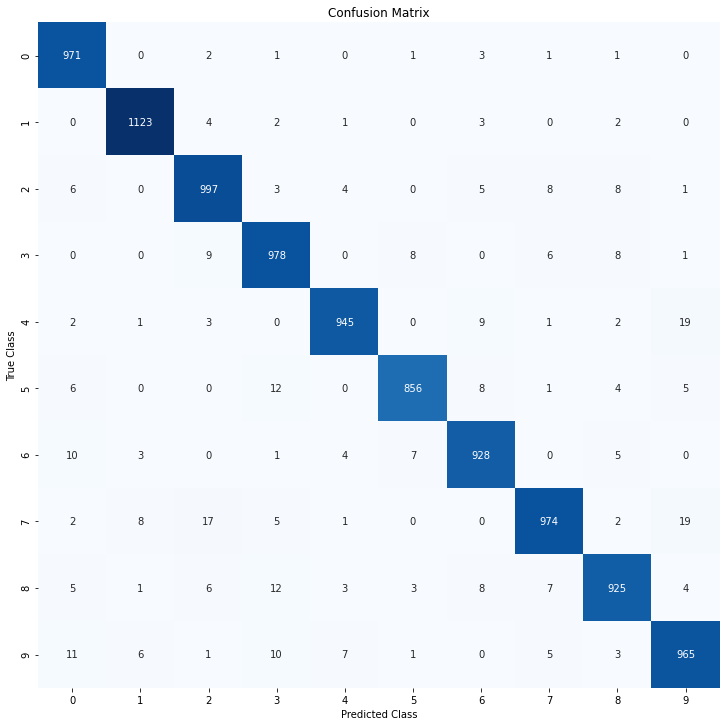

In [16]:
import pandas as pd
import seaborn as sns

class_names = range(10)

# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)

# Create heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues",fmt='g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")

plt.show()

# Overall the model did a good job is identifying the right digits as accuracy is 96.6%